In [97]:
#python3
# Hans D. Escobar H. (hdescobarh@unal.edu.co)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from statsmodels.stats.multitest import multipletests
from scipy.stats import permutation_test
from itertools import combinations

In [46]:
#araceae_df = pd.DataFrame(
#    [(10, 1, 50.0), (15, 1.5, 100.0), (18, 1.9, 60.0), (20, 2.7, 80.0), (11, 1.3, 90.0), (8, 1, 110.0), (9, 0.9, 200.0), (11, 0.8, 250.0), (32, 2, 111.0)],
#    columns= ["numero_hojas", "diametro_cm", "longitud_cm"])

araceae_df = pd.read_csv("./aracea_altura.csv", header= 1).astype({"grupo": str})
araceae_df.drop("grupo", axis=1, inplace= True)
araceae_df

,altura_m,diametro_cm,numero_hojas
0,0.70,1.27,12.0
1,0.74,1.62,16.0
2,1.01,1.24,10.0
3,1.00,1.34,9.0
4,0.83,1.46,10.0
5,0.76,1.27,12.0
6,1.36,1.43,17.0
7,0.87,1.21,4.0
8,1.25,1.27,20.0
9,1.01,1.59,15.0


## a

In [119]:
# Realiza el análisis de correlación de Spearman, devuelve stadisticos y p-values
rho, pvalue_uncorrected = spearmanr(araceae_df, alternative="two-sided")
# Extrae el triangulo superior sin la diagonal, y realiza corrección para multiples test
correction_output = multipletests(pvalue_uncorrected[np.triu_indices(3, 1)], method="bonferroni")
# Reconstruye una nueva matriz pero con los p-value corregidos
pvalue_corrected = np.zeros((3,3))
pvalue_corrected[np.triu_indices(3, 1)] = correction_output[1]
pvalue_corrected[np.tril_indices(3, -1)] = correction_output[1]


### ejemplo p-value por permutacion

In [122]:
r_spearman = lambda x: spearmanr(x,y).statistic
x = araceae_df['numero_hojas']
y = araceae_df['diametro_cm']
# Solo es necesario permutar una columna!
res_exact = permutation_test(
    (x, ), r_spearman, vectorized=False, permutation_type='pairings')
res_exact.statistic, res_exact.pvalue

PermutationTestResult(statistic=0.07548153631659311, pvalue=0.603, null_distribution=array([ 0.00678922,  0.38133573,  0.09674633, ..., -0.10993681,
        0.00434025,  0.15091458]))

## Graficas

In [130]:
column_names = list(araceae_df.columns)
rho_df = pd.DataFrame(rho, index = column_names, columns = column_names)
pvalue_df = pd.DataFrame(pvalue_corrected, index = column_names, columns = column_names)

<Axes: >

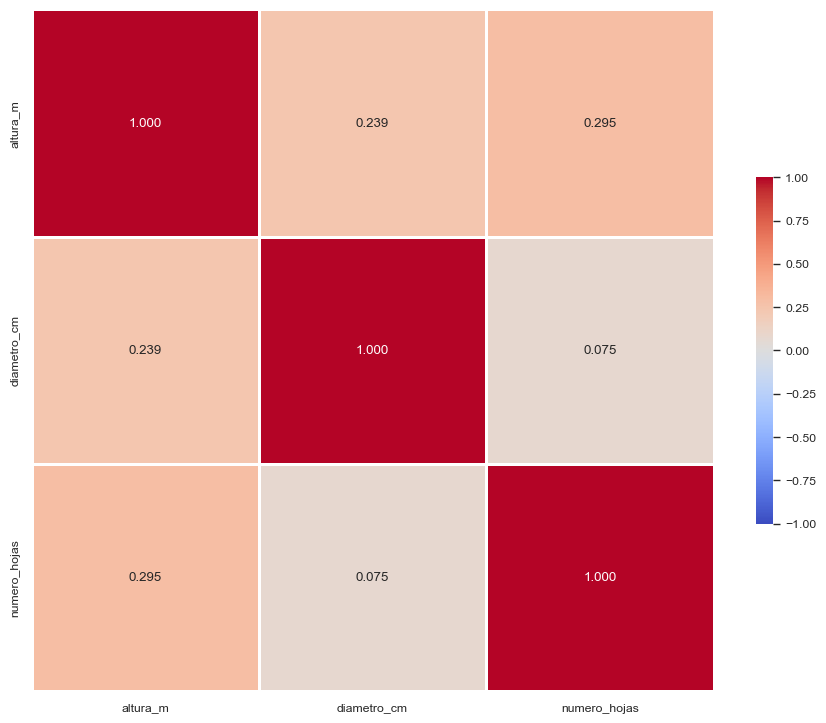

In [138]:
sns.set_theme(context= "paper", style="white", palette="bright")
mask = None #np.triu(np.ones_like(r_spearman, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.color_palette("coolwarm", as_cmap=True) # sns.diverging_palette(h_neg= 15, h_pos=225, s=100, l=40, as_cmap = True)
sns.heatmap(rho_df, mask=mask, annot= True, fmt=".3f",
            cmap=cmap, vmax=1, center=0, vmin=-1,
            square=True, linewidths=1, cbar_kws={"shrink": .5}, ax = ax)


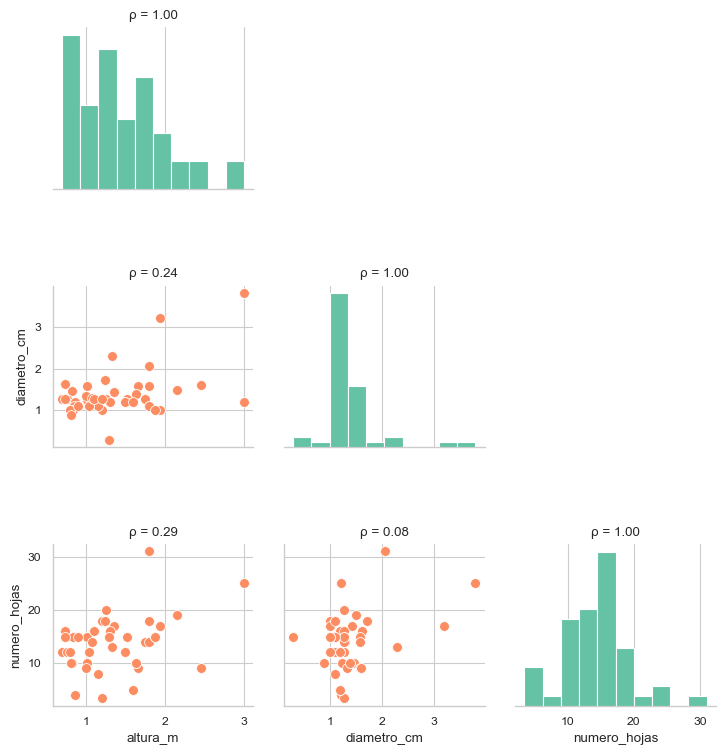

In [137]:
sns.set_theme(context= "paper", style="whitegrid", palette="muted")
s = set_title = np.vectorize(lambda ax,r: ax.title.set_text(
    "ρ = " + "{:.2f}".format(r)) if ax!=None else None) 
g = sns.PairGrid(araceae_df, diag_sharey=False, corner= True)
palette = sns.color_palette("Set2")
g.map_diag(plt.hist, color = palette[0]) # type: ignore
g.map_lower(sns.scatterplot, color = palette[1], s=50) # type: ignore
#g.map_upper(sns.kdeplot, lw=2)
plt.subplots_adjust(hspace = 0.6)
set_title(g.axes,rho_df)
plt.show() 